# Calculating Energy Surfaces of Binary Systems

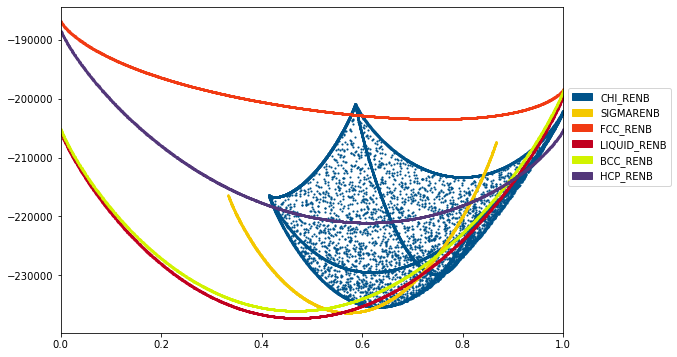

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pycalphad import Database, calculate
from pycalphad.plot.utils import phase_legend
import numpy as np

db_nbre = Database('databases/nbre_liu.tdb')
my_phases_nbre = ['CHI_RENB', 'SIGMARENB', 'FCC_RENB', 'LIQUID_RENB', 'BCC_RENB', 'HCP_RENB']

legend_handles, colorlist = phase_legend(my_phases_nbre)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases_nbre:
    result = calculate(db_nbre, ['NB', 'RE'], name, P=101325, T=2800, output='GM')
    ax.scatter(result.X.sel(component='RE'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()

# Plotting Isobaric Binary Phase Diagrams with `binplot`

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams.

Note that, at the time of writing, invariant reactions (three-phase 'regions' on binary diagrams) are not yet automatically detected so they
are not drawn on the diagram.

## Al-Zn (S. Mey, 1993)

The miscibility gap in the fcc phase is included in the Al-Zn diagram, shown below.

The format for specifying a range of a state variable is (*start*, *stop*, *step*).

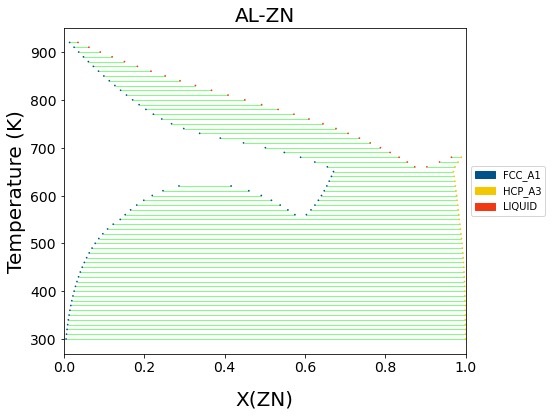

In [2]:
from pycalphad import binplot
import pycalphad.variables as v
db_alzn = Database('databases/alzn_mey.tdb')
my_phases_alzn = ['LIQUID', 'FCC_A1', 'HCP_A3']
fig = plt.figure(figsize=(9,6))
binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, {v.X('ZN'):(0,1,0.02),
                                                       v.T: (300, 1000, 10), v.P:101325}, plot_kwargs={'ax': fig.gca()})
plt.show()

## Cu-O (L. Schramm, 2005)


/opt/conda/lib/python3.8/site-packages/pycalphad/io/tdb.py:965: UserWarning: The type definition character `'` was defined in the following phases: ['FCC_A1'], but no corresponding TYPE_DEFINITION line was found in the TDB.
  warnings.warn(f"The type definition character `{typechar}` was defined in the following phases: "


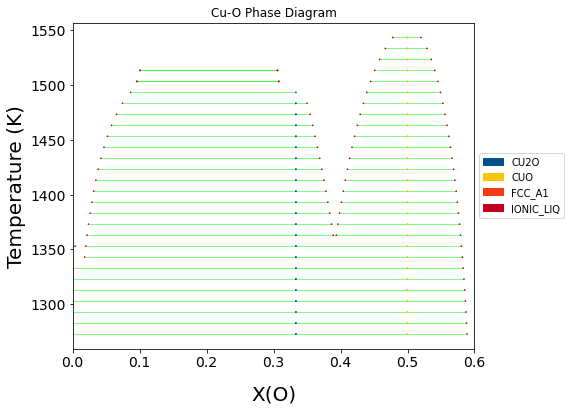

In [3]:
db_cuo = Database('databases/cuo_schramm.tdb')
my_components_cuo = ['CU', 'CU+1', 'CU+2', 'CU+3', 'O', 'O-2', 'O2', 'VA']
my_phases_cuo = ['IONIC_LIQ', 'FCC_A1', 'CU2O', 'CUO']

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
binplot(db_cuo, my_components_cuo, my_phases_cuo, {v.X('O'): (0,0.6,0.02),
                                                       v.T: (1273, 1673, 10), v.P:101325},
        plot_kwargs={'ax': ax})
ax.set_xlim((0, 0.6))
ax.set_title('Cu-O Phase Diagram')
fig.show()